# Boston Housing Dataset

Each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

# Importing Libaries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Downloading from the internet

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
print(train_data)

[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]


In [5]:
print(test_data)

[[1.80846e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.72500e+01
  2.90500e+01]
 [1.23290e-01 0.00000e+00 1.00100e+01 ... 1.78000e+01 3.94950e+02
  1.62100e+01]
 [5.49700e-02 0.00000e+00 5.19000e+00 ... 2.02000e+01 3.96900e+02
  9.74000e+00]
 ...
 [1.83377e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 3.89610e+02
  1.92000e+00]
 [3.58090e-01 0.00000e+00 6.20000e+00 ... 1.74000e+01 3.91700e+02
  9.71000e+00]
 [2.92400e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.40160e+02
  9.81000e+00]]


# Normalizing data

In [6]:
# Through Library
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_data = scale.fit_transform(train_data)
test_data = scale.fit_transform(test_data)
print(train_data)
print("##########################################################")
print(test_data)

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]
##########################################################
[[ 2.8040301  -0.50784934  0.96960877 ...  0.90513041 -4.27829517
   2.51324773]
 [-0.55530596 -0.50784934 -0.17801704 ... -0.28485844  0.3909446
   0.58604286]
 [-0.56808398 -0.50784934 -0.86176938 ...  0.90513041  0.41570668
  -0.38506427]
 ...
 [-0.23539182 -0.50784934  1.17955762 ... -1.82192738  0.32313459
  -1.55879807]
 [-0.5113909  -0.50784934 -0.71849348 ... -0.48318992  0.34967446
  -0.38956708]
 [-0.03148414 -0.50784934  1.17955762 ..

In [7]:
# Manually
#mean = train_data.mean(axis=0)
#std = train_data.std(axis=0)

#train_data -= mean
#train_data /= std
#print(train_data)
#print("#####################################################")
#mean = test_data.mean(axis=0)
#std = test_data.std(axis=0)

#test_data -= mean
#test_data /= std
#print(test_data)

In [8]:
x_train = train_data 
y_train = train_targets
x_test = test_data
y_test = test_targets


print("train :",x_train.shape)
print("train label :",y_train.shape)
print("test :",x_test.shape)
print("test label:",y_test.shape)

train : (404, 13)
train label : (404,)
test : (102, 13)
test label: (102,)


# First Model

In [9]:
input_shape = 13

models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Dense(64,activation="relu",input_shape=(input_shape,)),
                layers.Dense(32,activation="relu"),
                layers.Dense(16,activation="relu"),
                layers.Dense(1)])

model.compile(optimizer="rmsprop", # adam
             loss="mse",
             metrics=["mae"])

history = model.fit(x_train,y_train,epochs=100,validation_split=(0.2))

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 2s 5ms/sample - loss: 544.7571 - mae: 21.4709 - val_loss: 580.0597 - val_mae: 22.3307
Epoch 2/100
323/323 [==============================] - 0s 285us/sample - loss: 485.4231 - mae: 20.1193 - val_loss: 505.7543 - val_mae: 20.7029
Epoch 3/100
323/323 [==============================] - 0s 241us/sample - loss: 409.9075 - mae: 18.2696 - val_loss: 415.4723 - val_mae: 18.5190
Epoch 4/100
323/323 [==============================] - 0s 229us/sample - loss: 319.0845 - mae: 15.8113 - val_loss: 300.1341 - val_mae: 15.3909
Epoch 5/100
323/323 [==============================] - 0s 221us/sample - loss: 217.4173 - mae: 12.6321 - val_loss: 192.3898 - val_mae: 11.7539
Epoch 6/100
323/323 [==============================] - 0s 192us/sample - loss: 129.7049 - mae: 9.2672 - val_loss: 117.9633 - val_mae: 8.5553
Epoch 7/100
323/323 [==============================] - 0s 189us/sample - loss: 78.7361 - mae: 6.9185 

323/323 [==============================] - 0s 195us/sample - loss: 7.8244 - mae: 1.9323 - val_loss: 11.8202 - val_mae: 2.5377
Epoch 60/100
323/323 [==============================] - 0s 210us/sample - loss: 7.8677 - mae: 1.9116 - val_loss: 12.7737 - val_mae: 2.7414
Epoch 61/100
323/323 [==============================] - 0s 195us/sample - loss: 7.6612 - mae: 1.9221 - val_loss: 12.3869 - val_mae: 2.6343
Epoch 62/100
323/323 [==============================] - 0s 195us/sample - loss: 7.6071 - mae: 1.8668 - val_loss: 12.8824 - val_mae: 2.6317
Epoch 63/100
323/323 [==============================] - 0s 189us/sample - loss: 7.5821 - mae: 1.9044 - val_loss: 11.9374 - val_mae: 2.4659
Epoch 64/100
323/323 [==============================] - 0s 186us/sample - loss: 7.4593 - mae: 1.8648 - val_loss: 13.6325 - val_mae: 2.4802
Epoch 65/100
323/323 [==============================] - 0s 189us/sample - loss: 7.5725 - mae: 1.9415 - val_loss: 14.3095 - val_mae: 2.8645
Epoch 66/100
323/323 [==================

In [10]:
evaluation = model.evaluate(x_test,y_test,verbose=2)
print()
print("loss: ",evaluation[0])
print("MSE:  ",evaluation[1])

102/1 - 0s - loss: 91.8342 - mae: 3.3315

loss:  23.599929211186428
MSE:   3.3314903


# Plotting

In [11]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

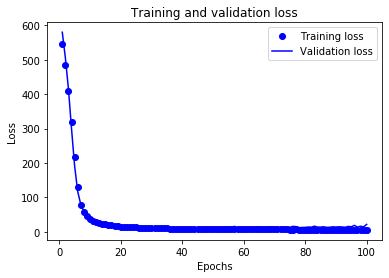

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

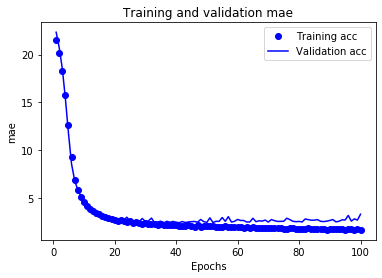

In [13]:
acc = history.history['mae']
val_acc = history.history['val_mae']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

#  Hyperperameter Tunning

In [14]:
def tuning_model2(epochs,drop):
    print()
    models = tf.keras.models.Sequential
    layers = tf.keras.layers

    model2 = models([layers.Dense(64,input_shape = (input_shape,)),
                     layers.Dropout(drop),
                     layers.Dense(64,activation="relu"),
                     layers.Dense(64,activation="relu"),
                     layers.Dropout(drop),
                     layers.Dense(1)])
    
    model2.compile(optimizer="adam", # rmsprop # adam # 
             loss="mse", # binary_crossentropy
              metrics=["mae"])
    
    history = model.fit(x_train,y_train,epochs=epochs,validation_split=(0.2))
    
    evaluation = model.evaluate(x_test,y_test,verbose=2)
    print()
    print("loss: ",evaluation[0])
    print("MSE:  ",evaluation[1])

In [15]:
epochs = 100 #500
drop   = 0.03
fold = 4
tuning_model2(epochs,drop)


Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 0s 244us/sample - loss: 6.4932 - mae: 1.7764 - val_loss: 14.3053 - val_mae: 2.5758
Epoch 2/100
323/323 [==============================] - 0s 232us/sample - loss: 5.7588 - mae: 1.6232 - val_loss: 14.1303 - val_mae: 2.6189
Epoch 3/100
323/323 [==============================] - 0s 230us/sample - loss: 6.0531 - mae: 1.6913 - val_loss: 13.6543 - val_mae: 2.5744
Epoch 4/100
323/323 [==============================] - 0s 229us/sample - loss: 5.5759 - mae: 1.6061 - val_loss: 14.4012 - val_mae: 2.6901
Epoch 5/100
323/323 [==============================] - 0s 232us/sample - loss: 5.9667 - mae: 1.6455 - val_loss: 14.9341 - val_mae: 2.7145
Epoch 6/100
323/323 [==============================] - 0s 235us/sample - loss: 5.9525 - mae: 1.7080 - val_loss: 14.4460 - val_mae: 2.5569
Epoch 7/100
323/323 [==============================] - 0s 229us/sample - loss: 5.7957 - mae: 1.6612 - val_loss: 18.1778 - val_

Epoch 60/100
323/323 [==============================] - 0s 204us/sample - loss: 4.5316 - mae: 1.4151 - val_loss: 14.8746 - val_mae: 2.5163
Epoch 61/100
323/323 [==============================] - 0s 204us/sample - loss: 4.6348 - mae: 1.4371 - val_loss: 16.1545 - val_mae: 2.5659
Epoch 62/100
323/323 [==============================] - 0s 204us/sample - loss: 4.5378 - mae: 1.4489 - val_loss: 15.0944 - val_mae: 2.5681
Epoch 63/100
323/323 [==============================] - 0s 204us/sample - loss: 4.6417 - mae: 1.4746 - val_loss: 17.1339 - val_mae: 2.6910
Epoch 64/100
323/323 [==============================] - 0s 210us/sample - loss: 4.8202 - mae: 1.4702 - val_loss: 15.5822 - val_mae: 2.6594
Epoch 65/100
323/323 [==============================] - 0s 207us/sample - loss: 4.8765 - mae: 1.5098 - val_loss: 14.8620 - val_mae: 2.5583
Epoch 66/100
323/323 [==============================] - 0s 204us/sample - loss: 4.3999 - mae: 1.3949 - val_loss: 15.4603 - val_mae: 2.5674
Epoch 67/100
323/323 [=====

# K-Fold

In [16]:
input_shape = 13

models = tf.keras.Sequential
layers = tf.keras.layers

model1 = models([layers.Dense(64,activation="relu",input_shape=(input_shape,)),
                 layers.Dropout(drop),
                 layers.Dense(64,activation="relu"),
                 layers.Dense(64,activation="relu"),
                 layers.Dropout(drop),
                 layers.Dense(1)])

model1.compile(optimizer="rmsprop", # adam #rmsprop
             loss="mse",
             metrics=["mae"])


In [17]:
k = 4
num_val_samples = len(x_train) // 4
num_epochs = 3 #500
drop   = 0.03
all_scores = []
all_mae_histories = []

for i in range(k):
  print('processing fold # ', i)
  # prepare the validation data: data from partition # k
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepare the training data: data from data - k
  partial_train_data = np.concatenate(                    
      [x_train[:i * num_val_samples],
      x_train[(i + 1 ) * num_val_samples:]],
  axis = 0)
  partial_train_targets = np.concatenate(
      [y_train[:i * num_val_samples],
      y_train[(i + 1 ) * num_val_samples:]],
  axis = 0)
  # Build the Keras Models (already commpiled)
  #model = build_model()
  # Train the model (in silence mode, verbose = 0)
  model1.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 1)
  # Evaluate the model on the validation data
  val_mse, val_mae = model1.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)

  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold #  0
Train on 303 samples
Epoch 1/3
303/303 [==============================] - 2s 6ms/sample - loss: 145.3636 - mae: 8.5320
Epoch 2/3
303/303 [==============================] - 1s 3ms/sample - loss: 24.7228 - mae: 3.6904
Epoch 3/3
303/303 [==============================] - 1s 3ms/sample - loss: 19.0750 - mae: 3.0813
processing fold #  1
Train on 303 samples
Epoch 1/3
303/303 [==============================] - 1s 3ms/sample - loss: 17.5197 - mae: 2.9167
Epoch 2/3
303/303 [==============================] - 1s 3ms/sample - loss: 15.6074 - mae: 2.8695
Epoch 3/3
303/303 [==============================] - 1s 3ms/sample - loss: 14.6785 - mae: 2.6537
processing fold #  2
Train on 303 samples
Epoch 1/3
303/303 [==============================] - 1s 3ms/sample - loss: 12.9150 - mae: 2.6367
Epoch 2/3
303/303 [==============================] - 1s 3ms/sample - loss: 11.6418 - mae: 2.4483
Epoch 3/3
303/303 [==============================] - 1s 3ms/sample - loss: 11.9295 - mae: 2.5945


In [18]:
print(all_scores)
print()
print(np.mean(all_scores))

[2.4469109, 4.0071015, 2.3088918, 2.6611521]

2.856014


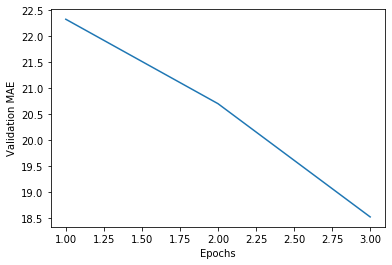

In [19]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1 ), average_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

# Hyperperameter tuning K-fold

In [20]:
def tuning_model3(epochs,drop,fold):
    print()
    models = tf.keras.models.Sequential
    layers = tf.keras.layers

    model2 = models([layers.Dense(64,input_shape = (input_shape,)),
                     layers.Dropout(drop),
                     layers.Dense(64,activation="relu"),
                     layers.Dense(64,activation="relu"),
                     layers.Dropout(drop),
                     layers.Dense(1)])
    
    model2.compile(optimizer="adam", # rmsprop # adam # 
             loss="mse", # binary_crossentropy
              metrics=["mae"])
    
    k = fold
    num_val_samples = len(x_train) // 4
    #num_epochs = 500
    all_scores = []
    all_mae_histories = []

    for i in range(k):
      print('processing fold # ', i)
      # prepare the validation data: data from partition # k
      val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
      val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

      # prepare the training data: data from data - k
      partial_train_data = np.concatenate(                    
          [x_train[:i * num_val_samples],
          x_train[(i + 1 ) * num_val_samples:]],
      axis = 0)
      partial_train_targets = np.concatenate(
          [y_train[:i * num_val_samples],
          y_train[(i + 1 ) * num_val_samples:]],
      axis = 0)
      # Build the Keras Models (already commpiled)
      # model = build_model()
      # Train the model (in silence mode, verbose = 0)
      model2.fit(partial_train_data, partial_train_targets, epochs = epochs, batch_size = 1, verbose = 1)
      # Evaluate the model on the validation data
      val_mse, val_mae = model2.evaluate(val_data, val_targets, verbose = 0)
      all_scores.append(val_mae)

      mae_history = history.history['val_mae']
      all_mae_histories.append(mae_history)
    
    print(all_scores)
    print()
    print("mae :",np.mean(all_scores))
    print()

In [21]:
epochs = 50 #500
drop   = 0.03
fold = 4
tuning_model3(epochs,drop,fold)


processing fold #  0
Train on 303 samples
Epoch 1/50
303/303 [==============================] - 2s 6ms/sample - loss: 164.0119 - mae: 9.3884
Epoch 2/50
303/303 [==============================] - 1s 3ms/sample - loss: 27.0412 - mae: 3.8629
Epoch 3/50
303/303 [==============================] - 1s 3ms/sample - loss: 19.0548 - mae: 3.2161
Epoch 4/50
303/303 [==============================] - 1s 4ms/sample - loss: 16.9803 - mae: 3.0228
Epoch 5/50
303/303 [==============================] - 1s 4ms/sample - loss: 13.9938 - mae: 2.7089
Epoch 6/50
303/303 [==============================] - 1s 3ms/sample - loss: 12.6389 - mae: 2.5659
Epoch 7/50
303/303 [==============================] - 1s 3ms/sample - loss: 15.3089 - mae: 2.8919
Epoch 8/50
303/303 [==============================] - 1s 3ms/sample - loss: 12.3298 - mae: 2.5289
Epoch 9/50
303/303 [==============================] - 1s 3ms/sample - loss: 13.4450 - mae: 2.7550
Epoch 10/50
303/303 [==============================] - 1s 3ms/sample - los

303/303 [==============================] - 1s 3ms/sample - loss: 5.1293 - mae: 1.7160
Epoch 34/50
303/303 [==============================] - 1s 3ms/sample - loss: 5.0940 - mae: 1.6628
Epoch 35/50
303/303 [==============================] - 1s 3ms/sample - loss: 5.1893 - mae: 1.6803
Epoch 36/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.8965 - mae: 1.6480
Epoch 37/50
303/303 [==============================] - 1s 3ms/sample - loss: 6.1009 - mae: 1.8622
Epoch 38/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.7810 - mae: 1.7114
Epoch 39/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.5770 - mae: 1.6823
Epoch 40/50
303/303 [==============================] - 1s 3ms/sample - loss: 11.4525 - mae: 2.0595
Epoch 41/50
303/303 [==============================] - 1s 3ms/sample - loss: 5.6657 - mae: 1.8408
Epoch 42/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.7535 - mae: 1.6540
Epoch 43/50
303/303 [==========

303/303 [==============================] - 1s 3ms/sample - loss: 4.6438 - mae: 1.5982
Epoch 16/50
303/303 [==============================] - 1s 3ms/sample - loss: 3.8667 - mae: 1.4762
Epoch 17/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.7238 - mae: 1.5956
Epoch 18/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.5510 - mae: 1.6055
Epoch 19/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.6255 - mae: 1.5660
Epoch 20/50
303/303 [==============================] - 1s 3ms/sample - loss: 3.7782 - mae: 1.4536
Epoch 21/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.5125 - mae: 1.6594
Epoch 22/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.7479 - mae: 1.6241
Epoch 23/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.9514 - mae: 1.6516
Epoch 24/50
303/303 [==============================] - 1s 3ms/sample - loss: 4.2632 - mae: 1.5141
Epoch 25/50
303/303 [===========